In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import tensorflow as tf
# read test and train files
test_data = np.load('/content/drive/MyDrive/HW10/test.npy')
train_data = np.load('/content/drive/MyDrive/HW10/train.npy')

test_data = test_data / 255.
train_data = train_data / 255.

In [4]:
# build encoder, image shape = (32, 32, 3)
encoder_input = tf.keras.Input(shape=(32, 32, 3))
encoder_conv1 = tf.keras.layers.Conv2D(16, 3, strides=2, padding='same')
encoder_conv2 = tf.keras.layers.Conv2D(8, 3, strides=2, padding='same')
flatten_layer = tf.keras.layers.Flatten()
encoder_dense = tf.keras.layers.Dense(128, activation='relu')

encoder_conv1_output = encoder_conv1(encoder_input)
encoder_conv2_output = encoder_conv2(encoder_conv1_output)
flatten_output = flatten_layer(encoder_conv2_output)
encoder_output = encoder_dense(flatten_output)

In [5]:
# build decoder, decoder input = 128 element vector
decoder_dense = tf.keras.layers.Dense(512, activation='relu')
reshape_layer = tf.keras.layers.Reshape(target_shape=(8, 8, 8))
decoder_deconv2 = tf.keras.layers.Conv2DTranspose(8, 3, strides=2, padding='same')
decoder_deconv1 = tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding='same')
decoder_final_layer = tf.keras.layers.Conv2D(3, 3, strides=1, padding='same')

decoder_input = decoder_dense(encoder_output)
decoder_input = reshape_layer(decoder_input)
decoder_deconv2_output = decoder_deconv2(decoder_input)
decoder_deconv1_output = decoder_deconv1(decoder_deconv2_output)
decoder_output = decoder_final_layer(decoder_deconv1_output)

In [6]:
# combine the encoder and decoder
model = tf.keras.Model(inputs=encoder_input, outputs=decoder_output)

# train the model
model.compile(optimizer='adam', loss='MSE')
model.fit(train_data, train_data, epochs=30, shuffle=True)

Epoch 1/30
1250/1250 [==============================] - 11s 3ms/step - loss: 3.9802e-06
Epoch 2/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.7843e-06
Epoch 3/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.8222e-06
Epoch 4/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.8131e-06
Epoch 5/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.8272e-06
Epoch 6/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.8097e-06
Epoch 7/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.8125e-06
Epoch 8/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.7965e-06
Epoch 9/30
1250/1250 [==============================] - 3s 3ms/step - loss: 3.6326e-06
Epoch 10/30
1250/1250 [==============================] - 3s 3ms/step - loss: 1.3399e-06
Epoch 11/30
1250/1250 [==============================] - 3s 3ms/step - loss: 1.1123e-06
Epoch 12/30
1250/1250 [=================

In [7]:
print(tf.shape(test_data))

tf.Tensor([10000    32    32     3], shape=(4,), dtype=int32)


In [8]:
test_pred = model.predict(test_data)
print(tf.shape(test_pred))

tf.Tensor([10000    32    32     3], shape=(4,), dtype=int32)


In [17]:
test_loss = tf.math.reduce_sum((test_data - test_pred) ** 2, axis=(1,2,3))
print(tf.shape(test_loss))

tf.Tensor([10000], shape=(1,), dtype=int32)


In [18]:
train_pred = model.predict(train_data)
train_loss = tf.math.reduce_sum((train_data - train_pred) ** 2, axis=(1,2,3))

print(max(train_loss), min(train_loss), tf.reduce_mean(train_loss))

tf.Tensor(0.03499252633234238, shape=(), dtype=float64) tf.Tensor(0.00016934968369791781, shape=(), dtype=float64) tf.Tensor(0.0025306883200178812, shape=(), dtype=float64)


In [42]:
thres = 0.01
anomaly_idx = tf.where(test_loss > thres)

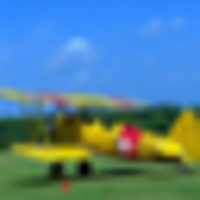

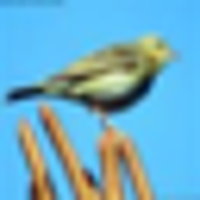

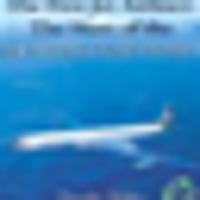

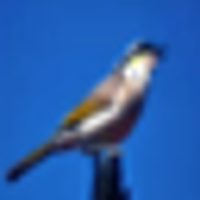

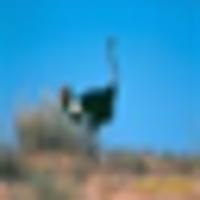

In [43]:
from PIL import Image
img_size = (32, 32, 3)
test_data = np.load('/content/drive/MyDrive/HW10/test.npy')
for i in range(5):
  img = test_data[anomaly_idx[i], :, :, :] * 255.
  img = tf.reshape(img, shape=img_size)
  img = tf.cast(img, dtype=tf.int32)
  img = tf.keras.preprocessing.image.array_to_img(img)
  img = img.resize((200, 200))
  display(img)

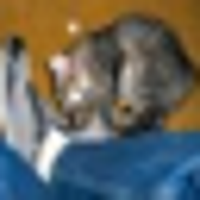

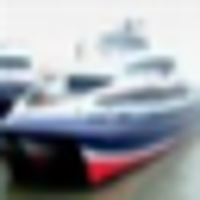

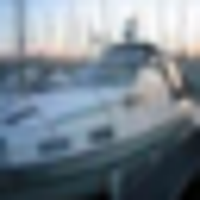

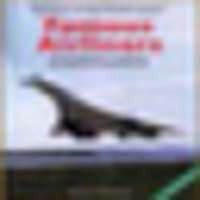

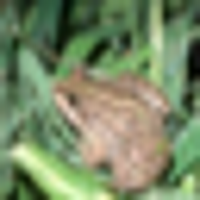

In [44]:
normal_idx = tf.where(test_loss <= thres)
img_size = (32, 32, 3)
for i in range(5):
  img = test_data[normal_idx[i], :, :, :] * 255.
  img = tf.reshape(img, shape=img_size)
  img = tf.cast(img, dtype=tf.int32)
  img = tf.keras.preprocessing.image.array_to_img(img)
  img = img.resize((200, 200))
  display(img)

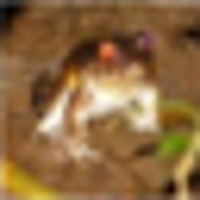

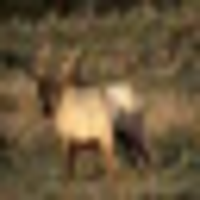

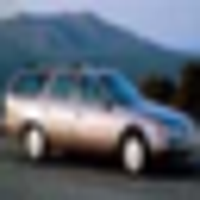

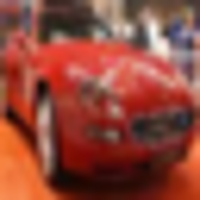

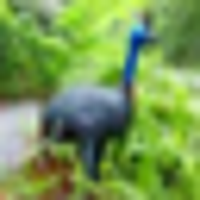

In [39]:
train_data = np.load('/content/drive/MyDrive/HW10/train.npy')
for i in range(5):
  img = train_data[i, :, :, :] * 255.
  img = tf.reshape(img, shape=img_size)
  img = tf.cast(img, dtype=tf.int32)
  img = tf.keras.preprocessing.image.array_to_img(img)
  img = img.resize((200, 200))
  display(img)